<a href="https://colab.research.google.com/github/YasminGarcia1210/MAT_APLICADAS03/blob/main/TALLER_PIPELINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=http://www.acofi.edu.co/eiei2016/wp-content/uploads/2016/09/Logo-Universidad-ICESI.jpg width="150" height="100" align="center">

#**<big><big>Análisis Exploratorio de Datos</big></big><br><small> Facultad de Ingeniería</small><br><small> CUADERNO_PIPELINE PRACTICA </small>**

## Mg. Yasmin Johanna García

In [74]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression

In [55]:
df = pd.DataFrame(columns=['X1', 'X2', 'y'], data=[
                                                   [1,3,28],
                                                   [2,5,77],
                                                   [3,7,150],
                                                   [4,9,247],
                                                   [5,11,368],
                                                   [6,13,513],
])

### y = X1 + 3 *(X2)**2
# Esto asegura que un modelo de regresión lineal simple no pueda ajustarse perfectamente

ValueError: ignored

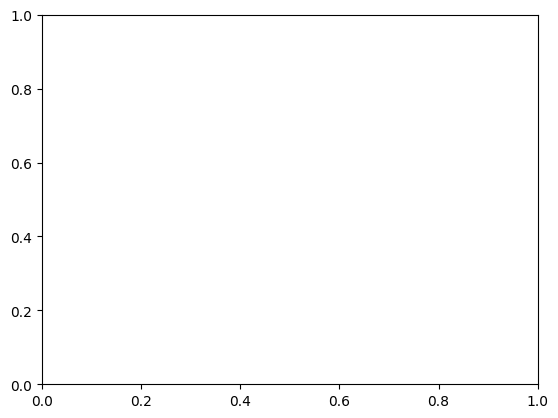

In [56]:
# Separamos en train y test

train = df.iloc[:3]
test = df.iloc[3:]

train_X = train.drop('y', axis=1)
train_y = train.y

test_X = test.drop('y', axis=1)
test_y = test.y

In [57]:
test_X

,X1,X2
3,4,9
4,5,11
5,6,13


In [58]:
m1 = LinearRegression()
fit1 = m1.fit(train_X, train_y)
preds = fit1.predict(test_X)
print(f"\n{preds}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds))}\n")


[207. 268. 329.]
RMSE: 123.09346042743299



In [59]:
train_X.X2 = 3*(train_X.X2)**2
test_X.X2 = 3*(test_X.X2)**2
print(test_X)
m2 = LinearRegression()
fit2 = m2.fit(train_X, train_y)
preds = fit2.predict(test_X)
print(f"\n{preds}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds))}\n")

   X1   X2
3   4  243
4   5  363
5   6  507

[247. 368. 513.]
RMSE: 1.503935499763765e-13



In [60]:
#Restauramos los dato a sus valores originales

train = df.iloc[:3]
test = df.iloc[3:]

train_X = train.drop('y', axis=1)
train_y = train.y

test_X = test.drop('y', axis=1)
test_y = test.y

In [66]:
# Creamos una clase transformadora

#__init__: este es el constructor. Se llama cuando se inicializa el pipeline.
#fit(): Se llama cuando hacemos fit en el pipeline.
#transform(): se llama cuando usamos fit o transform en el pipeline

class ExperimentalTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    print('\n>>>>>>>init() called.\n')

  def fit(self, X, y = None):
    print('\n>>>>>>>fit() called.\n')
    return self

  def transform(self, X, y = None):
    print('\n>>>>>>>transform() called.\n')
    X_ = X.copy() # creamos una copia para evitar cambios en el conjunto de datos original
    X_.X2 = 3*(X_.X2)**2 #Función
    return X_


In [67]:
# sin transformación de entrada - para validar que obtenemos los mismos resultados que antes
print("create pipeline 1")
pipe1 = Pipeline(steps=[
                       ('linear_model', LinearRegression())
])

print("fit pipeline 1")
pipe1.fit(train_X, train_y)

print("predict via pipeline 1")
preds1 = pipe1.predict(test_X)

print(f"\n{preds1}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds1))}\n")

create pipeline 1
fit pipeline 1
predict via pipeline 1

[207. 268. 329.]
RMSE: 123.09346042743299



In [68]:
# Con transformation de entradas

print("create pipeline 2")
pipe2 = Pipeline(steps=[
                       ('experimental_trans', ExperimentalTransformer()),    # esto dispara una llamda a __init__
                       ('linear_model', LinearRegression())
])

# una sintaxis alternativa y más corta para hacer lo anterior, sin nombrar cada paso, es:
#pipe2 = make_pipeline(ExperimentalTransformer(), LinearRegression())

print("fit pipeline 2")
pipe2.fit(train_X, train_y)

print("predict via pipeline 2")
preds2 = pipe2.predict(test_X)

print(f"\n{preds2}")  # should be [14. 17.]
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds2))}\n") #RMSE error cuadratico medio

# a. __init__ se llama cuando inicializamos pipe2.


create pipeline 2

>>>>>>>init() called.

fit pipeline 2

>>>>>>>fit() called.


>>>>>>>transform() called.

predict via pipeline 2

>>>>>>>transform() called.


[247. 368. 513.]
RMSE: 1.503935499763765e-13



In [69]:
class ExperimentalTransformer_2(BaseEstimator, TransformerMixin):

  # agregue otro parámetro adicional, solo para mostrar su uso, mientras estamos en ello

  def __init__(self, feature_name, additional_param = "Otra Función"):
    print('\n>>>>>>>init() ExperimentalTransformer_2 called.\n')
    self.feature_name = feature_name
    self.additional_param = additional_param

  def fit(self, X, y = None):
    print('\n>>>>>>>fit() called.\n')
    print(f'\nadditional param ExperimentalTransformer_2 ~~~~~ {self.additional_param}\n')
    return self

  def transform(self, X, y = None):
    print('\n>>>>>>>transform() called.\n')
    X_ = X.copy() # creating a copy to avoid changes to original dataset
    X_[self.feature_name] = 3 *(X_[self.feature_name])**2
    return X_


In [70]:
print("Crear pipeline 2")
pipe2 = Pipeline(steps=[
                       ('experimental_trans', ExperimentalTransformer_2('X2',additional_param='new')),
                       ('linear_model', LinearRegression())
])
print("fit pipeline 2")
pipe2.fit(train_X, train_y)
print("predict via pipeline 2")
preds2 = pipe2.predict(test_X)
print(f"\n{preds2}")
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds2))}\n")

Crear pipeline 2

>>>>>>>init() ExperimentalTransformer_2 called.

fit pipeline 2

>>>>>>>fit() called.


additional param ExperimentalTransformer_2 ~~~~~ new


>>>>>>>transform() called.

predict via pipeline 2

>>>>>>>transform() called.


[247. 368. 513.]
RMSE: 1.503935499763765e-13

